In [35]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

df = pd.read_csv("data/train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df["Survived_Label"] = df["Survived"].map({0: "Did Not Survive", 1: "Survived"})

# survival rate dataset by gender
gender_survival = df.groupby("Sex")["Survived"].mean().reset_index()

# survival rate dataset by class
class_survival = df.groupby("Pclass")["Survived"].mean().reset_index()


In [36]:
# survival rate per class
class_survival_rate = df.groupby("Pclass")["Survived"].mean()

class_survival_rate = class_survival_rate.reindex([1, 2, 3])

print(class_survival_rate)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


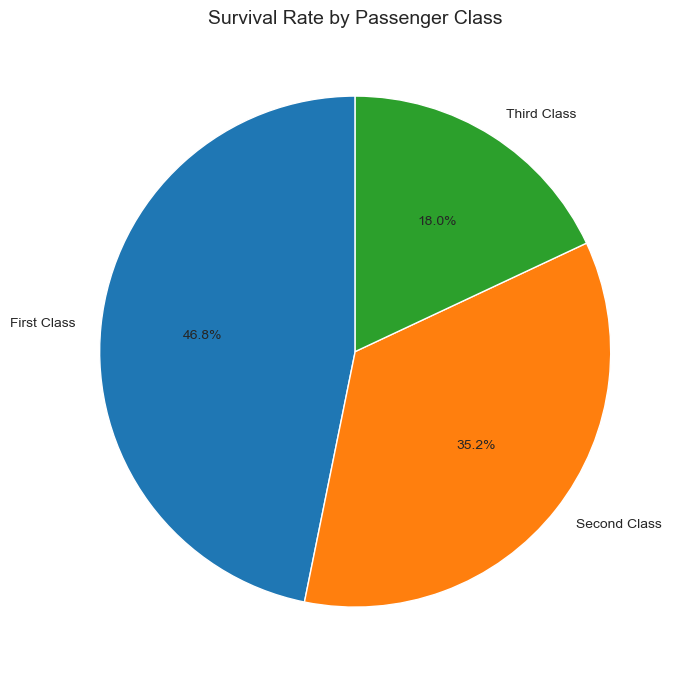

In [15]:
labels = ["First Class", "Second Class", "Third Class"]

plt.figure(figsize=(7,7))

plt.pie(
    class_survival_rate,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Survival Rate by Passenger Class", fontsize=14)

plt.tight_layout()
plt.show()


*Figure 1. This shows the survival rate by passenger across classes, showing each class as a percentage of the total amount of the population for a very easy comprenhension of distribution. This visualization is effective because it shows the information in a clear manner, showing each slice as a representation of the categories of class by accounting for 100% of the passengers. 
The visualization shows that first class, even though having the smallest amount of passengers in the titanic, they were the ones with the higher survival percentage rate while third class being the one with highest amount of passengers and showing the smallest percentage of survival.*

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_9067/3428993696.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=survival_rates.index, y=survival_rates.values, ci=None, palette="Blues", order=[1, 2, 3])


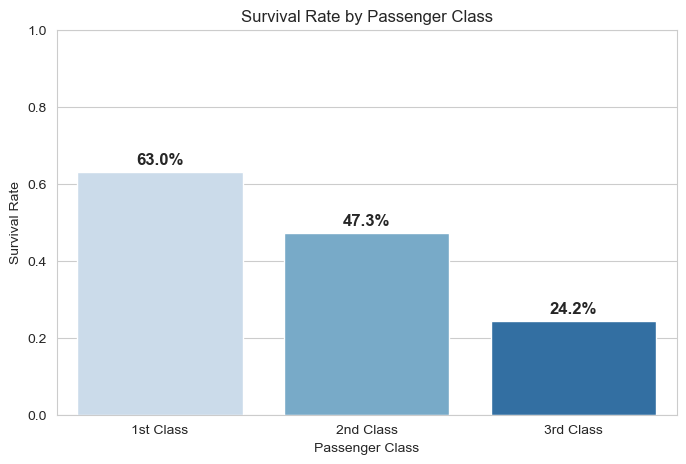

In [37]:
# survival rates by class
survival_rates = df.groupby("Pclass")["Survived"].mean()

# Effective Visualization: Bar Plot of Survival Rate by Passenger Class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=survival_rates.index, y=survival_rates.values, ci=None, palette="Blues", order=[1, 2, 3])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"])
plt.ylim(0, 1)


for i, v in enumerate(survival_rates.values):
    ax.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

Figure 2. This figure shows a clear message of what this bar chart represents. Showing survival rate by passenger class in a descending order that can be interpreted by all types of audiences. Why is it effective? Because the design alllows for easy interpretation and showing clear labels that compare the survival rates.

# misleading visualization 

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_9067/2812110270.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=survival_rates.index[::-1], y=survival_rates.values[::-1], ci=None, palette="Greys", order=[3, 2, 1])


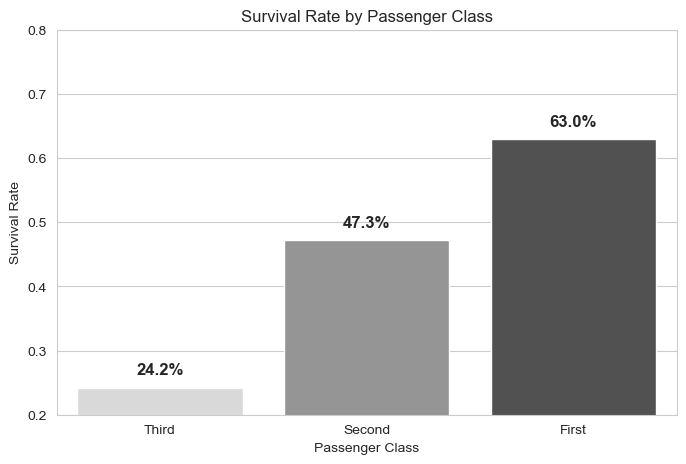

In [38]:
# Ineffective Visualization: Misleading Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=survival_rates.index[::-1], y=survival_rates.values[::-1], ci=None, palette="Greys", order=[3, 2, 1])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(ticks=[0, 1, 2], labels=["Third", "Second", "First"])  # Unclear labeling
plt.ylim(0.2, 0.8)  # Truncated Y-axis


for i, v in enumerate(survival_rates.values[::-1]):
    ax.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()


*Figure 3. What makes this visualization not effective is that passenger classes have been altered to confuse and mislead the message. The y-axis was truncated, making the information appear more significant since it cuts off parts of the scale, which makes the percentages in the visualization look more drastic than they actually are. Finally, the scale of tones of grey was chosen to make the viewer confused when it comes to the overall results and distinction.*

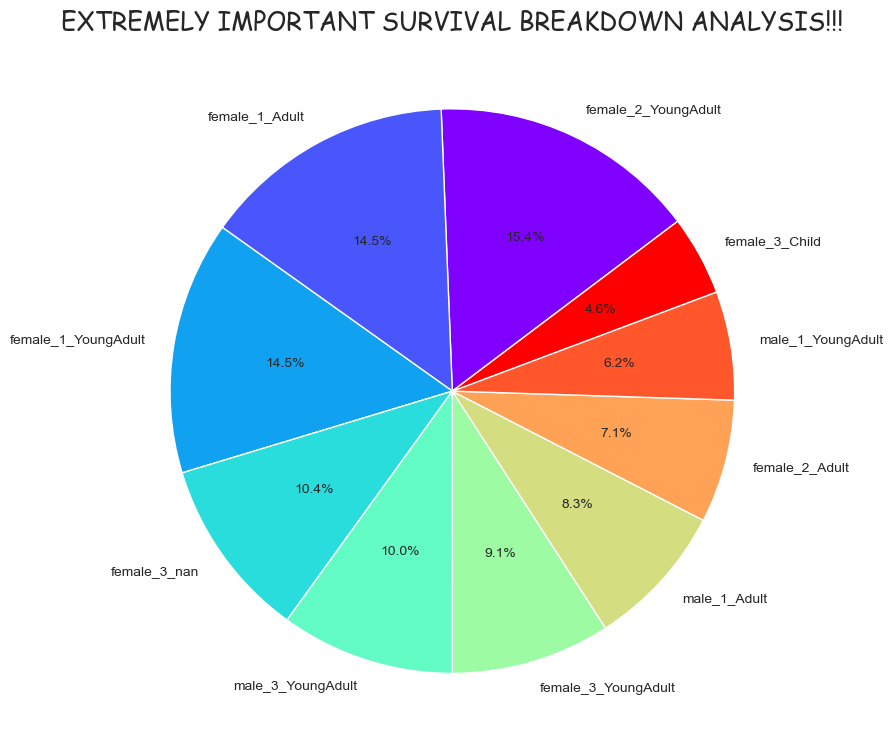

In [39]:

df["Weird_Category"] = (
    df["Sex"] + "_" +
    df["Pclass"].astype(str) + "_" +
    pd.cut(df["Age"], bins=[0,12,18,35,60,100],
           labels=["Child","Teen","YoungAdult","Adult","Senior"]).astype(str)
)

# Fill missing ages
df["Weird_Category"] = df["Weird_Category"].fillna("Unknown_Age_Group")

# Count survivors by these random categories
weird_counts = df[df["Survived"] == 1]["Weird_Category"].value_counts().head(10)

# Colors
colors = plt.cm.rainbow(np.linspace(0,1,len(weird_counts)))


plt.figure(figsize=(9,9))

plt.pie(
    weird_counts,
    labels=weird_counts.index,
    autopct='%1.1f%%',
    startangle=37,
    colors=colors
)

plt.title(
    "EXTREMELY IMPORTANT SURVIVAL BREAKDOWN ANALYSIS!!!",
    fontsize=18,
    fontname="Comic Sans MS"
)

plt.tight_layout()
plt.show()


Figure 4. Another eineffective visualization. First reason is that the chart is dividing survivors into categories that are just unnecssary, combining them to categories like gender, class, and age groups. This just overwhelms the viewer with visual infomration. This is also one instance where a pie chart does not make sense since dividing it into such a few categories makes it hard to distinguish the percentages and just misleadsthe viewer. 